Задача за DSCM006
=================

Предаваме като .ipynb в Moodle в курса DSCM006 до 15.02.2022 г.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [21]:
df_train = pd.read_csv('X_train.csv', encoding='"ISO-8859-1"')
df_test = pd.read_csv('X_test.csv', encoding='"ISO-8859-1"')

1.   Направете основен експлораторен анализ на обучителния набор;
2.   Намалете размерността на данните (PCA, correlation, VIF);
3.   Направете необходимите операции, за да присвоите на категорийните променливи числови стойности, така че те да могат да бъдат използвани в модел;
4.   Мащабирайте данните - необходимо е най-вече за SVM от моделите, които ще използвате;
5.   Използвайки кръстосана валидация с обучителния набор, намерете най-добрия модел, варирайки хиперпараметрите. Използвайте логистична регресия и метода на опорните вектори. Опитайте всички възможности за тези модели и чрез GridSearchCV или по друг начин намерете най-добрия модел като експериментирате с различни приложими метрики за оценка на точността;
6.   За SVM, scikit-learn предлага ядрата ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, които в т.5 се очаква да използвате в решението си. Освен тях, опитайте модел със сплайн ядро, което е описано [в доклад на Steve Gunn от 1998 г](http://www.svms.org/tutorials/Gunn1998.pdf). За начина на внедряване на код за ядра в sklearn можете да ползвате указанията по [тази](https://krypticmouse.hashnode.dev/training-svm-over-custom-kernels) връзка, а за реализация на сплайн ядро може да използвате [този](https://github.com/gmum/pykernels/blob/master/pykernels/regular.py) код. Ако намерите по-подходящи ядра, опитайте и с тях;
7.   *По желание.* Проучете как работи XGBoost и опитайте да решите задачата с него;
8.   След като сте избрали най-добрия модел, вижте как той се справя на тестовия набор. 

In [22]:
# 1 eksploratoren analiz na df_train
df_train.head()

,Unnamed: 0,Bad_Flag,x1,x2,x3,x4,x5,x6,x7,x8,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,x101,x102,x103,x104,x105,x106,x107,x108,x109,x110,x111,x112,x113,x114,x115,x116,x117,x118,x119,x120,x121,x122,x123,x124,x125,x126,x127,x128,x129,x130,x131,x132,x133,x134,x135,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145,x146,x147,x148,x149,x150,x151,x152,x153,x154,x155,x156,x157,x158,x159,x160,x161,x162,x163,x164,x165,x166,x167,x168,x169,x170,x171,x172,x173,x174,x175,x176,x177,x178,x179,x180,x181,x182,x183,x184,x185,x186,x187,x188,x189,x190,x191,x192,x193,x194,x195,x196,x197,x198,x199,x200,x201,x202,x203,x204,x205,x206,x207,x208,x209,x210,x211,x212,x213,x214,x215,x216,x217,x218,x219,x220,x221,x222,x223,x224,x225,x226,x227,x228,x229,x230,x231,x232,x233,x234,x235,x236,x237,x238,x239,x240,x241,x242,x243,x244,x245,x246,x247,x248,x249,x250,x251,x252,x253,x254,x255,x256,x257,x258,x259,x260,x261,x262,x263,x264,x265,x266,x267,x268,x269,x270,x271,x272,x273,x274,x275,x276
0,707,0,56,NoDPD,NoDPD,NoDPD,NoDPD,NoDPD,NoDPD,NoDPD,Never,Never,Never,Never,DPDCurrent,DPDCurrent,DPDCurrent,0,0,0,0,0,0.0,0.0,0.0,2428.33,0.00,0,0,963.02,0,0,0.00,1728.33,0.00,963.02,0.00,1728.33,0.00,167.61,0.00,0.0,0.00,2272.24,0.00,0.0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0.00,0.0,0.0,167.61,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,260.83,0.00,700.22,0.00,963.02,0.00,702.19,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,963.02,0.00,700.0,0,0.0,0.0,543.91,0.0,0.0,0,0.00,0,0,0,1663.24,0,0,0.00,0,0.0,963.02,0.00,700.22,0.00,0,0.0,0.0,963.02,0.00,0,0,0,0.000000,0,0,1.000000,0,0,0.000000,0.000000,0.557197,0.000000,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,1,0,0.000000,0.000000,0.0,Yes,20.80,2012.6800,2001.600,5,20.80,2012.6800,2001.600,5,ÐÐµÐ·ÑÑÐ¾ÑÐµÐ½ ÑÑÑÐ´Ð¾Ð² Ð´Ð¾Ð³Ð¾Ð²Ð¾Ñ,01,Yes,1,1,807.877778,799.0,72332009,4910,0.0,0.0,0.0,1.0,7,364,72,364,4,364,49,364,1,1,812.316667,799.0,72332009,4910,0.0,0.0,0.0,1.0,7,183,72,183,4,183,49,183,1,1,807.877778,799.0,72332009,4910,0.0,0.0,0.0,1.0,7,91,72,91,4,91,49,91,133,377,3,Yes,0.0,NaN,Missing,0.0,0.0,0,Missing,Missing,No,2428.33,0.00,2428.33,963.02,0.00,963.02,0.00,0.00,0.00,0.00,Íå,Äà,Íå,Äà
1,5740,1,21,NoDPD,NoDPD,NoDPD,NoDPD,NoDPD,NoDPD,NoDPD,Never,Never,Never,Never,DPDCurrent,DPDCurrent,DPDCurrent,0,0,0,0,0,0.0,0.0,0.0,0.00,2300.00,0,0,0.00,0,0,1277.27,0.00,800.00,0.00,777.27,0.00,800.00,0.00,169.23,0.0,0.00,0.00,1800.00,0.0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0.00,0.0,0.0,0.00,169.23,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,856.27,0.00,1277.27,0.00,1277.27,0.0,1500.0,0.0,500.0,0.0,1000.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,1152.68,0.0,0,0.0,0.0,0.00,0.0,0.0,0,0.00,0,0,0,0.00,0,0,2133.54,0,0.0,0.00,1277.27,0.00,856.27,0,0.0,0.0,0.00,1152.68,0,0,0,1.000000,0,0,0.000000,0,0,1.000000,1.000000,0.000000,0.971588,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000000,0,5,0.000000,0.000000,0.0,Yes,0.00,0.0000,0.000,0,0.00,0.0000,0.000,0,Missing,Missing,No,0,0,0.000000,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,No,0.0,NaN,Missing,0.0,0.0,0,Missing,Missing,No,0.00,2300.00,2300.00,0.00,1277.27,1277.27,777.27,0.00,0.00,0.00,Äà,Íå,Íå,Íå
2,6646,0,31,NoDPD,NoDPD,NoDPD,NoDPD,NoDPD,NoDPD,NoDPD,Never,Never,Never,Never,DPDCurrent,DPDCurrent,DPDCurrent,0,0,0,0,0,0.0,0.0,0.0,8500.00,29469.17,0,0,8220.00,0,0,27234.56,7000.00,29469.17,6826.00,27234.56,7000.00,29469.32,104.49,497.93,0.0,122.11,8473.00,29469.32,0.0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0.00,0.0,0.0,134.49,497.93,7742.0,27234.56,0.0,0.0,35.36,122.11

In [23]:
df_train.describe()

,Unnamed: 0,Bad_Flag,x1,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,x101,x102,x103,x104,x105,x106,x107,x108,x109,x110,x111,x112,x113,x114,x115,x116,x117,x118,x119,x120,x121,x122,x123,x124,x125,x126,x127,x128,x129,x130,x131,x132,x133,x134,x135,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145,x146,x147,x148,x149,x150,x151,x152,x153,x154,x155,x156,x157,x158,x159,x160,x161,x162,x163,x164,x165,x166,x167,x168,x169,x170,x171,x172,x173,x174,x175,x176,x177,x178,x179,x180,x181,x182,x183,x185,x186,x187,x188,x189,x190,x191,x192,x196,x197,x198,x199,x200,x201,x202,x203,x204,x205,x206,x207,x208,x209,x210,x211,x212,x213,x214,x215,x216,x217,x218,x219,x220,x221,x222,x223,x224,x225,x226,x227,x228,x229,x230,x231,x232,x233,x234,x235,x236,x237,x238,x239,x240,x241,x242,x243,x244,x245,x246,x247,x248,x249,x250,x251,x252,x254,x257,x258,x259,x263,x264,x265,x266,x267,x268,x269,x270,x271,x272
count,6591.000000,6591.000000,6591.000000,6591.0,6591.0,6591.0,6591.0,6591.0,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.0,6591.0,6591.000000,6591.0,6591.0,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.0,6591.000000,6591.0,6591.0,6591.0,6591.0,6591.0,6591.0,6591.000000,6591.0,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6.591000e+03,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.00000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.0,6591.0,6591.0,6591.000000,6591.0,6591.0,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.0,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.0,6591.0,6591.000000,6591.0,6591.0,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.00000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.0,6591.0,6591.0,6591.0,6591.0,6591.0,6591.0,6591.0,6591.0,6591.000000,6591.0,6591.000000,6591.0,6591.000000,6591.0,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6.591000e+03,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6.591000e+03,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6.591000e+03,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000
mean,4404.311182,0.113792,41

In [120]:
y = df_train.Bad_Flag.values
df_train.drop(['Bad_Flag'], inplace = True, axis = 1)

In [121]:
# 2 PCA

df_train.shape

(6591, 276)

In [136]:
# Vzimame samo kolonite s chislovi stoinosti za da izpolzvame PCA
df_numerical = pd.DataFrame()
df_categorical = pd.DataFrame()
for col in df_train.columns:
    if (df_train[col].dtype == 'int64') or (df_train[col].dtype == 'float64'):
        df_numerical[col] = df_train[col]
    else:
        df_categorical[col] = df_train[col]

/tmp/ipykernel_3035/3538791448.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_numerical[col] = df_train[col]


In [137]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
pca.fit(df_numerical)
csum = np.cumsum(pca.explained_variance_ratio_)
dimensions = np.argmax(csum >= 0.95) + 2
print(dimensions)

2


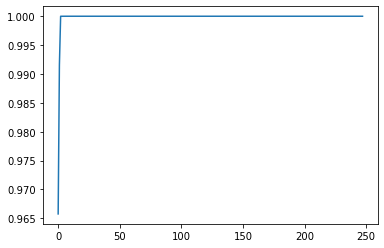

In [138]:
plt.plot(csum)

In [139]:
df_numerical.shape

(6591, 248)

In [140]:
# Probvame bez nulevite koloni
for col in df_numerical.columns:
    if df_numerical[col].sum() == 0:
        df_numerical.drop([col], inplace = True, axis = 1)

In [141]:
df_numerical.shape

(6591, 209)

In [142]:
pca = PCA(n_components=None)
pca.fit(df_numerical)
csum = np.cumsum(pca.explained_variance_ratio_)
dimensions = np.argmax(csum >= 0.95) + 2
print(dimensions)

2


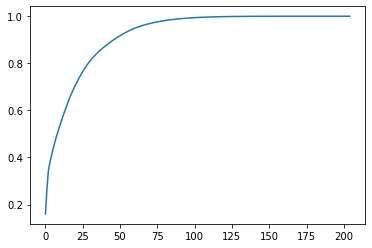

In [108]:
plt.plot(csum)

In [110]:
pca = PCA(n_components = dimensions)
X_pca = pca.fit_transform(df_numerical)

In [111]:
X_pca

array([[ 5.93481639e+00, -2.73317723e+00, -1.87079284e+00, ...,
         1.26397629e-01, -3.67682747e-01, -1.72624697e-01],
       [-7.91399037e+00, -1.01645612e+00,  2.65761479e+00, ...,
         1.47669680e-01,  2.82622196e-02, -2.77601970e-01],
       [ 6.91516918e+00,  5.71790757e+00,  1.20044865e+01, ...,
         4.95742025e-01,  3.18498468e-01, -1.27789107e+00],
       ...,
       [ 3.73786071e+00, -4.06721449e+00,  1.79910113e+00, ...,
         9.50649501e-02, -6.58451342e-02,  1.21350062e-01],
       [-4.96282285e+00,  5.73237984e+00, -3.63445764e+00, ...,
         1.68315283e-03,  2.21471799e-02,  1.37528423e+00],
       [ 4.49362989e+00,  1.39460209e+01,  8.84257858e+00, ...,
        -7.16906310e-01, -6.17656802e-01,  1.73842278e+00]])

In [88]:
# 3 
df_categorical.shape

(6591, 28)

In [89]:
df_categorical.head()

,x2,x3,x4,x5,x6,x7,x8,x10,x11,x12,x13,x14,x15,x16,x184,x193,x194,x195,x253,x255,x256,x260,x261,x262,x273,x274,x275,x276
0,NoDPD,NoDPD,NoDPD,NoDPD,NoDPD,NoDPD,NoDPD,Never,Never,Never,Never,DPDCurrent,DPDCurrent,DPDCurrent,Yes,ÐÐµÐ·ÑÑÐ¾ÑÐµÐ½ ÑÑÑÐ´Ð¾Ð² Ð´Ð¾Ð³Ð¾Ð²Ð¾Ñ,01,Yes,Yes,NaN,Missing,Missing,Missing,No,Íå,Äà,Íå,Äà
1,NoDPD,NoDPD,NoDPD,NoDPD,NoDPD,NoDPD,NoDPD,Never,Never,Never,Never,DPDCurrent,DPDCurrent,DPDCurrent,Yes,Missing,Missing,No,No,NaN,Missing,Missing,Missing,No,Äà,Íå,Íå,Íå
2,NoDPD,NoDPD,NoDPD,NoDPD,NoDPD,NoDPD,NoDPD,Never,Never,Never,Never,DPDCurrent,DPDCurrent,DPDCurrent,Yes,ÐÐµÐ·ÑÑÐ¾ÑÐµÐ½ ÑÑÑÐ´Ð¾Ð² Ð´Ð¾Ð³Ð¾Ð²Ð¾Ñ,01,Yes,Yes,NaN,Missing,Missing,Missing,No,Äà,Äà,Íå,Äà
3,NoDPD,DPD90,NoDPD,NoDPD,NoDPD,NoDPD,NoDPD,Never,More24M,Never,Never,DPDCurrent,DPDCurrent,DPDCurrent,Yes,ÐÐµÐ·ÑÑÐ¾ÑÐµÐ½ ÑÑÑÐ´Ð¾Ð² Ð´Ð¾Ð³Ð¾Ð²Ð¾Ñ,01,Yes,Yes,NaN,Missing,Missing,Missing,No,Íå,Äà,Íå,Äà
4,NoDPD,NoDPD,NoDPD,NoDPD,NoDPD,NoDPD,NoDPD,Never,Never,Never,Never,DPDCurrent,DPDCurrent,DPDCurrent,Yes,Missing,Missing,No,No,NaN,Missing,Missing,Missing,No,Äà,Íå,Íå,Íå


In [90]:
df_categorical.x2.unique()

array(['NoDPD', 'DPD180', 'DPD90', 'DPD181'], dtype=object)

In [91]:
df_categorical.x255.value_counts().sum()

545

In [92]:
# Proverka kakuv procent ot stoinostite v x255 e nan
100 - (54500 / 6591)

91.73114853588227

In [93]:
# nad 90% sledva kolonata da bude dropnata
df_categorical.drop(['x255'], axis = 1, inplace = True)

In [101]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df_categorical.columns:
    df_categorical[col] = le.fit_transform(df_categorical[col])

In [102]:
df_categorical

,x2,x3,x4,x5,x6,x7,x8,x10,x11,x12,x13,x14,x15,x16,x184,x193,x194,x195,x253,x256,x260,x261,x262,x273,x274,x275,x276
0,3,3,3,3,1,2,1,2,2,2,2,0,0,0,0,4,0,1,1,0,0,0,0,1,0,1,0
1,3,3,3,3,1,2,1,2,2,2,2,0,0,0,0,0,20,0,0,0,0,0,0,0,1,1,1
2,3,3,3,3,1,2,1,2,2,2,2,0,0,0,0,4,0,1,1,0,0,0,0,0,0,1,0
3,3,2,3,3,1,2,1,2,1,2,2,0,0,0,0,4,0,1,1,0,0,0,0,1,0,1,0
4,3,3,3,3,1,2,1,2,2,2,2,0,0,0,0,0,20,0,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6586,3,3,3,2,1,2,1,2,2,2,1,0,0,0,0,4,0,1,1,0,0,0,0,0,1,1,1
6587,3,3,3,3,1,2,1,2,2,2,2,0,0,0,0,4,0,1,1,0,0,0,0,1,0,1,0
6588,3,3,3,1,1,2,1,2,2,2,1,0,0,0,0,7,11,1,1,0,0,0,0,0,1,1,1
6589,3,3,2,2,1,2,1,2,2,1,1,0,0,0,0,5,5,1,0,0,0,0,0,1,0,1,0


In [112]:
# 4 standartizaciq: Z = x - mu / sigma | mu - mean value, sigma - standard deviation
from sklearn.preprocessing import StandardScaler

stds = StandardScaler()

X_pca = stds.fit_transform(X_pca)

In [113]:
X_pca

array([[ 1.03538178e+00, -5.93666424e-01, -4.57781531e-01, ...,
         1.72334307e-01, -5.27742369e-01, -2.51444525e-01],
       [-1.38066637e+00, -2.20781828e-01,  6.50316238e-01, ...,
         2.01337257e-01,  4.05653266e-02, -4.04354052e-01],
       [ 1.20641308e+00,  1.24197205e+00,  2.93748836e+00, ...,
         6.75909502e-01,  4.57147194e-01, -1.86137164e+00],
       ...,
       [ 6.52103216e-01, -8.83429237e-01,  4.40238624e-01, ...,
         1.29614396e-01, -9.45088324e-02,  1.76758072e-01],
       [-8.65808813e-01,  1.24511554e+00, -8.89348912e-01, ...,
         2.29486091e-03,  3.17882884e-02,  2.00323417e+00],
       [ 7.83953907e-01,  3.02917947e+00,  2.16377199e+00, ...,
        -9.77451503e-01, -8.86535108e-01,  2.53218050e+00]])

In [115]:
X = np.hstack([X_pca, df_categorical.iloc[:, :].values])

In [117]:
X.shape

(6591, 90)